In [5]:
import hist
import numpy as np
import matplotlib.pyplot as plt
import boost_histogram as bh

In [6]:
h = hist.NamedHist(
    hist.axis.Regular(50, -5, 5, name="S", title="s [units]", underflow=False, overflow=False),
    hist.axis.Regular(50, -5, 5, name="W", title="w [units]", underflow=False, overflow=False),
    hist.axis.Regular(50, -5, 5, name="I", title="i [units]", underflow=False, overflow=False)
)

h.fill(S=np.random.normal(size=1_000_000), 
       I=np.random.normal(size=1_000_000)+2*np.ones(1_000_000), 
       W=np.random.normal(size=1_000_000)+np.ones(1_000_000))

NamedHist(
  Regular(50, -5, 5, underflow=False, overflow=False, metadata={'name': 'S', 'title': 's [units]'}),
  Regular(50, -5, 5, underflow=False, overflow=False, metadata={'name': 'W', 'title': 'w [units]'}),
  Regular(50, -5, 5, underflow=False, overflow=False, metadata={'name': 'I', 'title': 'i [units]'}),
  storage=Double()) # Sum: 998641.0

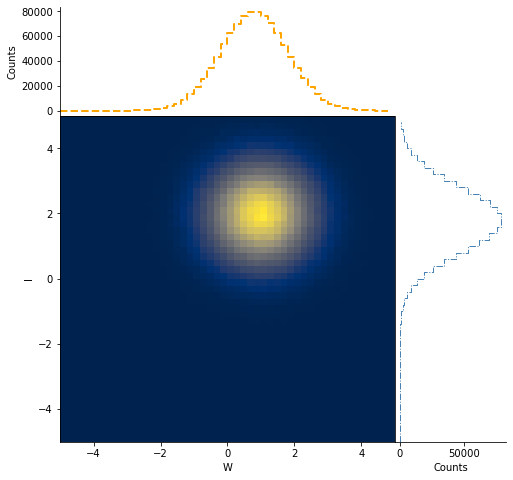

In [7]:
h.project("W", "I").plot(main_cmap="cividis", top_ls="--", top_color="orange", top_lw=2, 
                         side_ls="-.", side_lw=1, side_color="steelblue")
plt.show()

In [8]:
h = hist.NamedHist(
    hist.axis.Regular(100, -1, 1, name="X"),
    hist.axis.Regular(100, -1, 1, name="Y"),
    hist.axis.Bool(name="V"),
)

x, y = np.random.random_sample([2, 1_000_000])*2 - 1
valid = np.abs(x)**2 + (y + .2 - np.power(np.abs(x), 2/3))**2 < .5
h.fill(Y=y, X=x, V=valid)

valid_only = h[{'V':bh.loc(True)}]   # this will cause dimentionality reduction

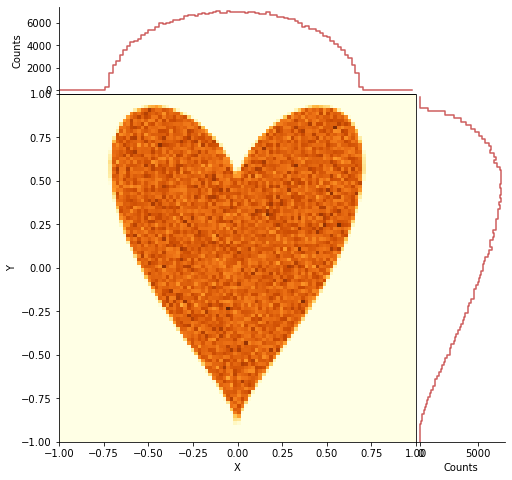

In [11]:
fig = plt.figure(figsize=(8, 8))
grid = fig.add_gridspec(5, 5, hspace=0, wspace=0)

main_ax = fig.add_subplot(grid[1:5, 0:4])
top_ax = fig.add_subplot(grid[0:1, 0:4], sharex=main_ax)
side_ax = fig.add_subplot(grid[1:5, 4:5], sharey=main_ax)

fig, main_ax, top_ax, side_ax = valid_only.plot(fig, main_ax, top_ax, side_ax,
                                               main_cmap="YlOrBr", top_color="indianred",
                                               side_color="indianred")
plt.show()